In [4]:
import glob
import matplotlib.pyplot as plt
import json

In [14]:
def plot(h_tilde):
    files = glob.glob('./experiments/fasttext/*fasttext*_h' + str(h_tilde) + '.json')
    files = sorted(files, key=(lambda x: float(x.split('_V')[1].split('_h')[0])))

    plt.figure(3)
    fig, axs = plt.subplots(1, len(files), figsize=(50, 6))

    count = 0
    for fname in files:
        with open(fname, 'r') as f:
            d = json.load(f)
        
        V_str = fname.split('_V')[1].split('_h')[0]
        
        x = []
        acc = []
        energy = []
        model = []
        
        for item in d:
            x.append(item['iteration'])
            acc.append(item['chosen_models_avg_accuracy'])
            energy.append(item['chosen_models_avg_energy'])
            model.append(item['chosen_model'])

        category_counts = {}
        for category in model:
            if category in category_counts:
                category_counts[category] += 1
            else:
                category_counts[category] = 1
        
        category_names = list(category_counts.keys())
        counts = list(category_counts.values())
        

        ax = axs[count]
        ax.bar(category_names, counts)
        ax.set_title('h_tilde=' + str(h_tilde) + ', V=' + V_str)
        ax.set_xlabel('Model')
        ax.set_ylabel('Frequency')
        
        # plt.xlabel('Model')
        # plt.ylabel('Frequency')
        # plt.title('h_tilde=' + str(h_tilde) + ', V=' + V_str)
        
        plt.figure(1)
        plt.plot(x, acc, label='V='+V_str)
        plt.legend()
        plt.title('h_tilde=' + str(h_tilde))
        plt.xlabel('Steps')
        plt.ylabel('Average accuracy')
        plt.grid(True)
        
        plt.figure(2)
        plt.plot(x, energy, label='V='+V_str)
        plt.legend()
        plt.title('h_tilde=' + str(h_tilde))
        plt.xlabel('Steps')
        plt.ylabel('Average energy')
        plt.grid(True)

        count += 1

    plt.figure(1)
    plt.savefig('acc_h_tilde' + str(h_tilde) + '.png', bbox_inches='tight')

    plt.figure(2)
    plt.savefig('energy_h_tilde' + str(h_tilde) + '.png', bbox_inches='tight')

    plt.figure(3)
    fig.savefig('hist_h_tilde' + str(h_tilde) + '.png', bbox_inches='tight')

In [13]:
import glob
import json
import matplotlib.pyplot as plt

def plot(h_tilde):
    # files = glob.glob('./experiments/fasttext/*_h' + str(h_tilde) + '.json')
    files = glob.glob('./experiments/fasttext/*fasttext*_h' + str(h_tilde) + '.json')
    files = sorted(files, key=(lambda x: float(x.split('_V')[1].split('_h')[0])))

    plt.figure(3)
    fig, axs = plt.subplots(1, len(files), figsize=(50, 6))

    count = 0
    for fname in files:
        with open(fname, 'r') as f:
            d = json.load(f)
        
        V_str = fname.split('_V')[1].split('_h')[0]
        
        x = []
        acc = []
        energy = []
        model = []
        s_loss = []
        l_loss = []
        
        for item in d:
            x.append(item['iteration'])
            acc.append(item['chosen_models_avg_accuracy'])
            energy.append(item['chosen_models_avg_energy'])
            model.append(item['chosen_model'])
            s_loss.append(item['s_loss'])
            l_loss.append(item['l_loss'])

        category_counts = {}
        for category in model:
            if category in category_counts:
                category_counts[category] += 1
            else:
                category_counts[category] = 1
        
        category_names = list(category_counts.keys())
        counts = list(category_counts.values())
        print(counts)

        ax = axs[count]
        ax.bar(category_names, counts)
        ax.set_title('h_tilde=' + str(h_tilde) + ', V=' + V_str)
        ax.set_xlabel('Model')
        ax.set_ylabel('Frequency')
        
        plt.figure(1)
        plt.plot(x, acc, label='V='+V_str)
        plt.legend()
        plt.title('Average BLEU Score (h_tilde=' + str(h_tilde) + ')')
        plt.xlabel('Steps')
        plt.ylabel('Average BLEU Score')
        plt.grid(True)

        plt.figure(2)
        plt.plot(x, energy, label='V='+V_str)
        plt.legend()
        plt.title('Average Energy Consumption (h_tilde=' + str(h_tilde) + ')')
        plt.xlabel('Steps')
        plt.ylabel('Average energy (watts)')
        plt.grid(True)

        plt.figure(4)
        plt.plot(x, s_loss, label='V='+V_str)
        plt.legend()
        plt.title('s_loss (h_tilde=' + str(h_tilde) + ')')
        plt.xlabel('Steps')
        plt.ylabel('s_loss')
        plt.grid(True)
        
        # Plot l_loss
        plt.figure(5)
        plt.plot(x, l_loss, label='V='+V_str)
        plt.legend()
        plt.title('l_loss (h_tilde=' + str(h_tilde) + ')')
        plt.xlabel('Steps')
        plt.ylabel('l_loss')
        plt.grid(True)

        count += 1

    plt.figure(1)
    plt.savefig('plots/acc_h_tilde' + str(h_tilde) + '.png', bbox_inches='tight')

    plt.figure(2)
    plt.savefig('plots/energy_h_tilde' + str(h_tilde) + '.png', bbox_inches='tight')

    plt.figure(3)
    fig.savefig('plots/hist_h_tilde' + str(h_tilde) + '.png', bbox_inches='tight')
    
    plt.figure(4)
    plt.savefig('plots/s_loss_h_tilde' + str(h_tilde) + '.png', bbox_inches='tight')
    
    plt.figure(5)
    plt.savefig('plots/l_loss_h_tilde' + str(h_tilde) + '.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

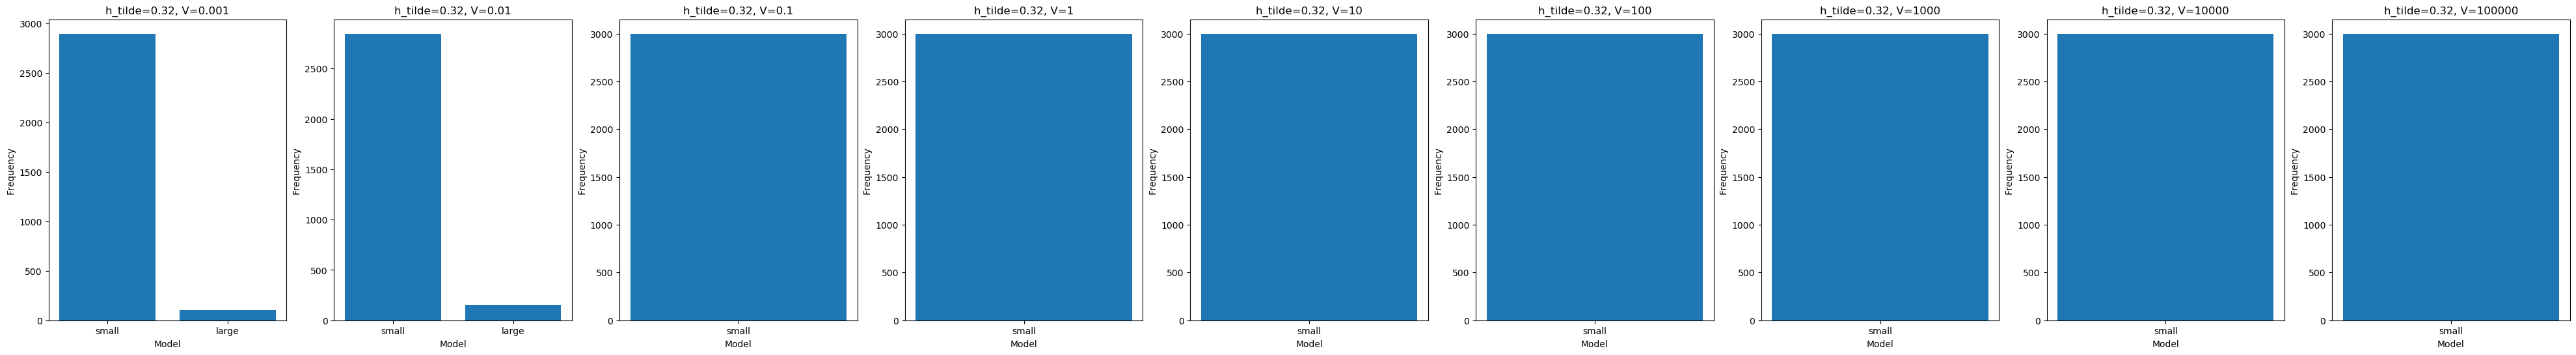

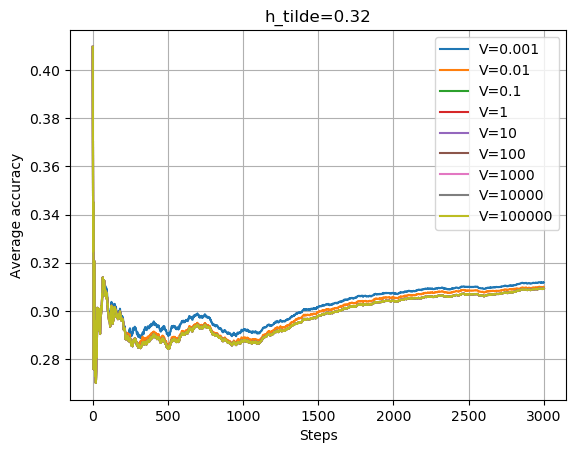

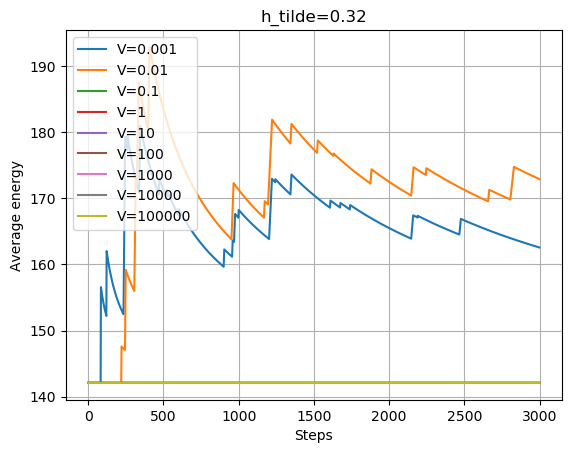

In [15]:
plot(0.32)

<Figure size 640x480 with 0 Axes>

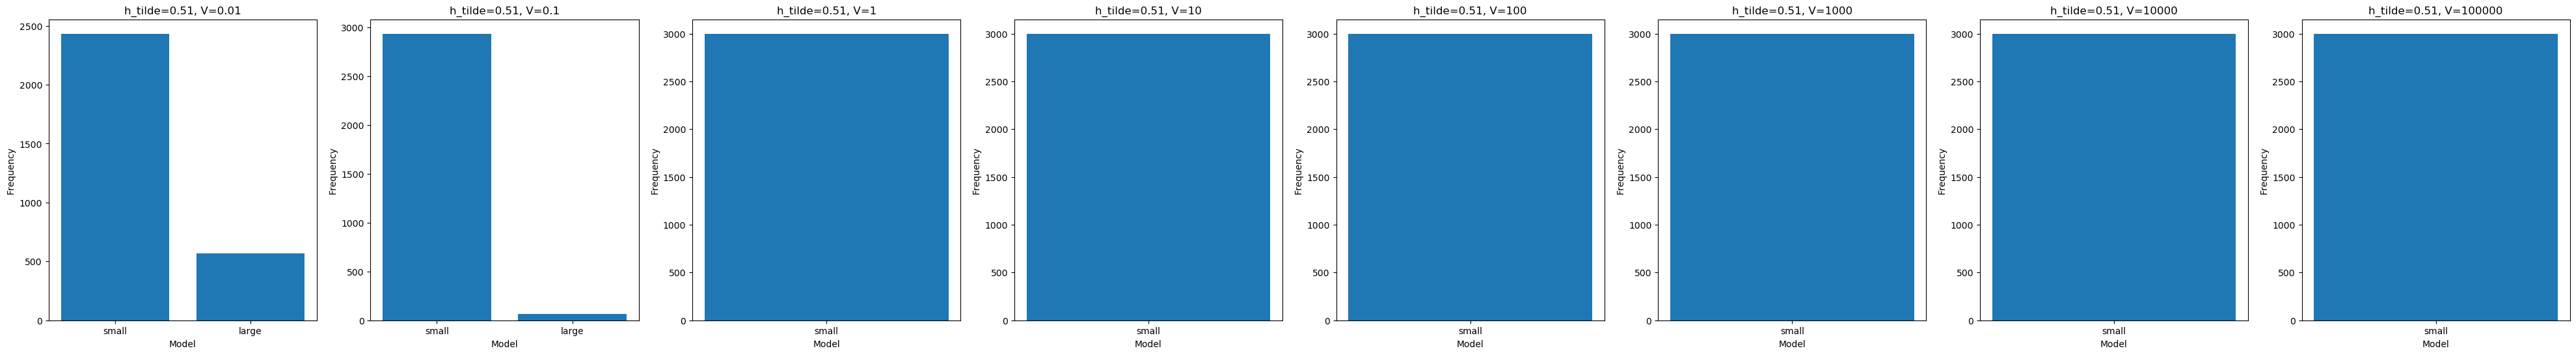

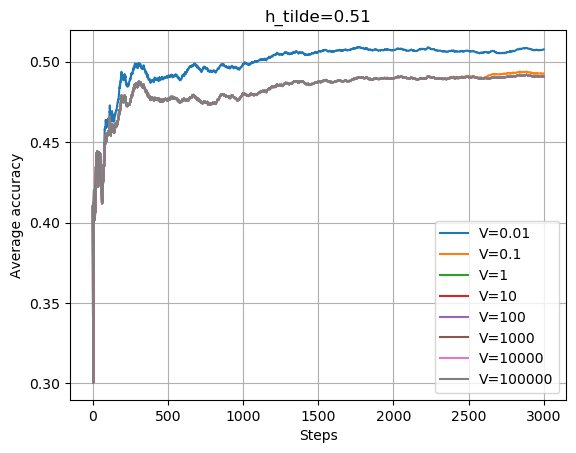

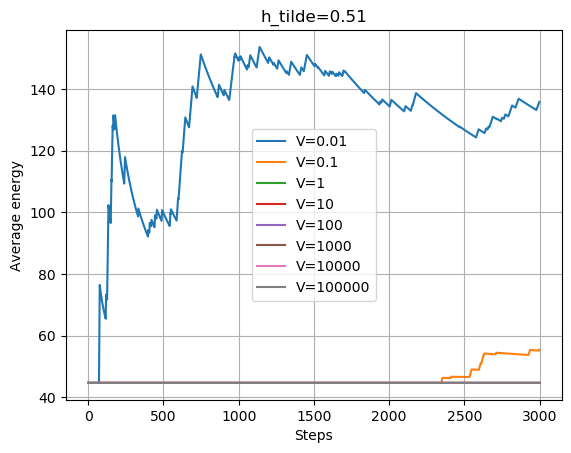

In [18]:
plot(0.51)

[2404, 595]
[2361, 638]
[2532, 467]
[2771, 228]
[2999]
[2999]
[2999]
[2999]


<Figure size 640x480 with 0 Axes>

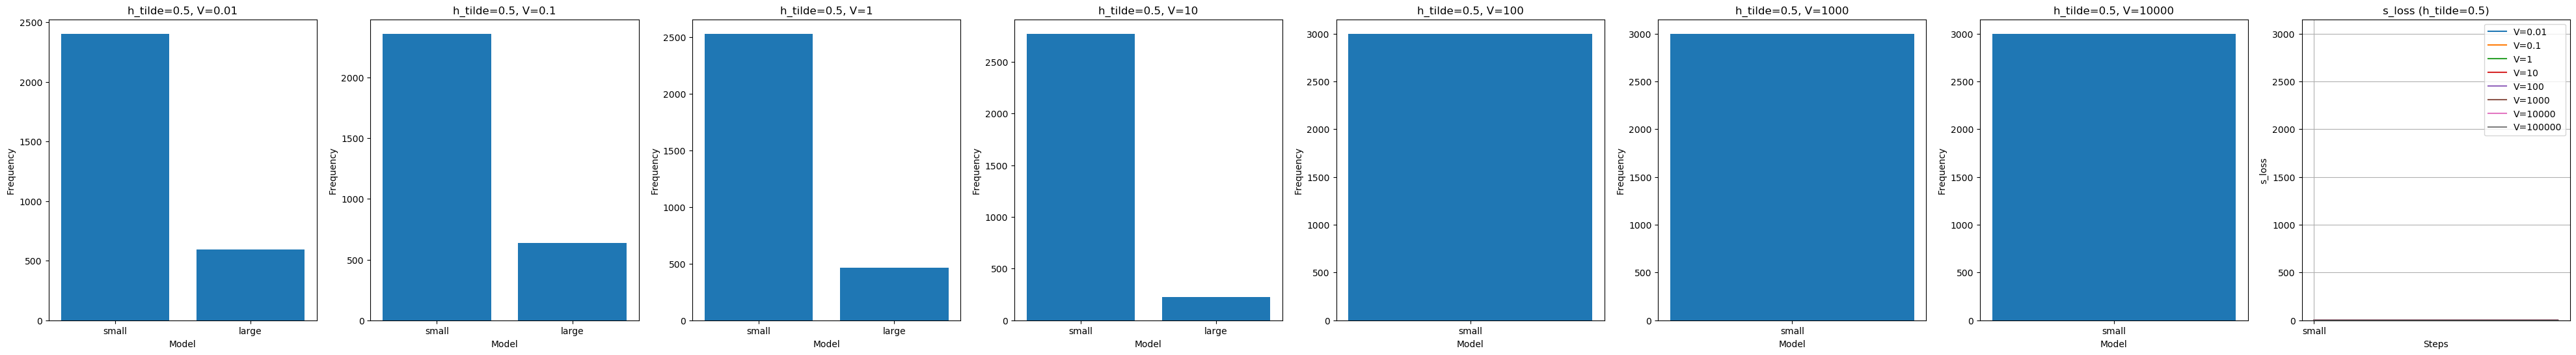

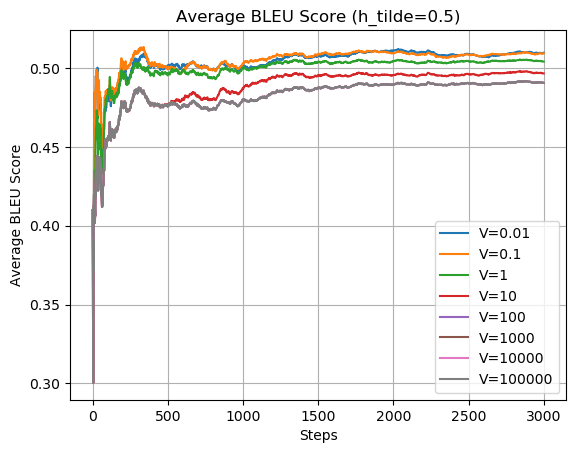

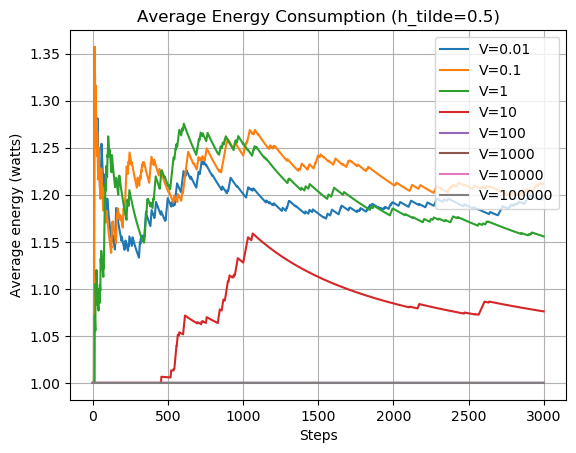

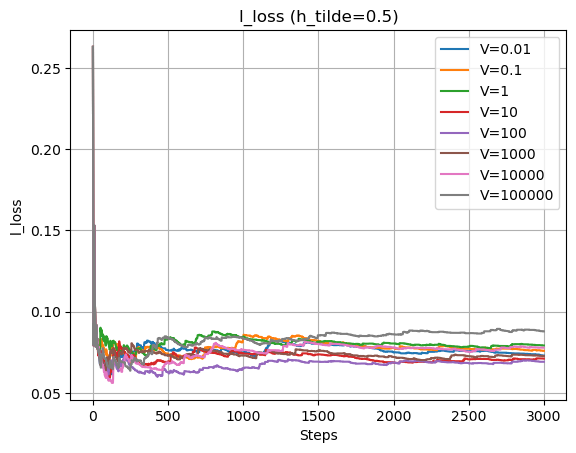

In [38]:
plot(0.5)

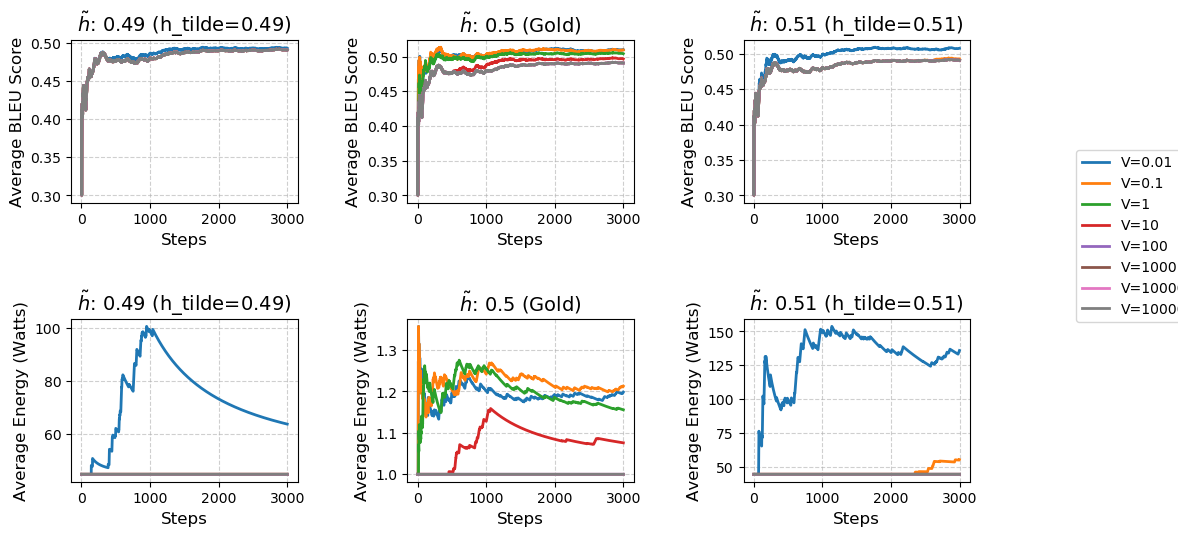

In [21]:
import matplotlib.pyplot as plt
import glob
import json

def plot_all_h_tilde(h_tilde_values):
    h_tilde_labels = {0.45: 'Silver', 0.5: 'Gold', 0.55: 'Platinum'}
    
    fig, axs = plt.subplots(2, len(h_tilde_values), figsize=((len(h_tilde_values)) * 3.5, 6))

    # Create empty lists to store handles and labels for the single legend
    handles = []
    labels = []
    added_legend_labels = set()  # To track already added labels and avoid duplicates

    for idx, h_tilde in enumerate(h_tilde_values):
        files = glob.glob('./experiments/fasttext/*fasttext*_h' + str(h_tilde) + '.json')
        files = sorted(files, key=(lambda x: float(x.split('_V')[1].split('_h')[0])))

        for fname in files:
            with open(fname, 'r') as f:
                d = json.load(f)

            V_str = fname.split('_V')[1].split('_h')[0]

            x = []
            acc = []
            energy = []

            for item in d:
                x.append(item['iteration'])
                acc.append(item['chosen_models_avg_accuracy'])
                energy.append(item['chosen_models_avg_energy'])

            h_label = h_tilde_labels.get(h_tilde, f'h_tilde={h_tilde}')

            line_acc, = axs[0, idx].plot(x, acc, label=f'V={V_str}', linewidth=2)
            axs[0, idx].set_title(f'$\\tilde{{h}}$: {h_tilde} ({h_label})', fontsize=14)
            axs[0, idx].set_xlabel('Steps', fontsize=12)
            axs[0, idx].set_ylabel('Average BLEU Score', fontsize=12)
            axs[0, idx].grid(True, linestyle='--', alpha=0.6)
            axs[0, idx].tick_params(axis='both', labelsize=10)

            line_energy, = axs[1, idx].plot(x, energy, label=f'V={V_str}', linewidth=2)
            axs[1, idx].set_title(f'$\\tilde{{h}}$: {h_tilde} ({h_label})', fontsize=14)
            axs[1, idx].set_xlabel('Steps', fontsize=12)
            axs[1, idx].set_ylabel('Average Energy (Watts)', fontsize=12)
            axs[1, idx].grid(True, linestyle='--', alpha=0.6)
            axs[1, idx].tick_params(axis='both', labelsize=10)

            if V_str not in added_legend_labels:
                handles.append(line_acc)
                labels.append(f'V={V_str}')
                added_legend_labels.add(V_str)  
                
    fig.legend(handles, labels, loc='center right', fontsize=10, bbox_to_anchor=(1.15, 0.5))

    plt.tight_layout(pad=3.0)
    plt.savefig('plots/average_bleu_energy_comparison.png', bbox_inches='tight', dpi=300)
    plt.show()

h_tilde_values = [.49, .5, .51]
plot_all_h_tilde(h_tilde_values)

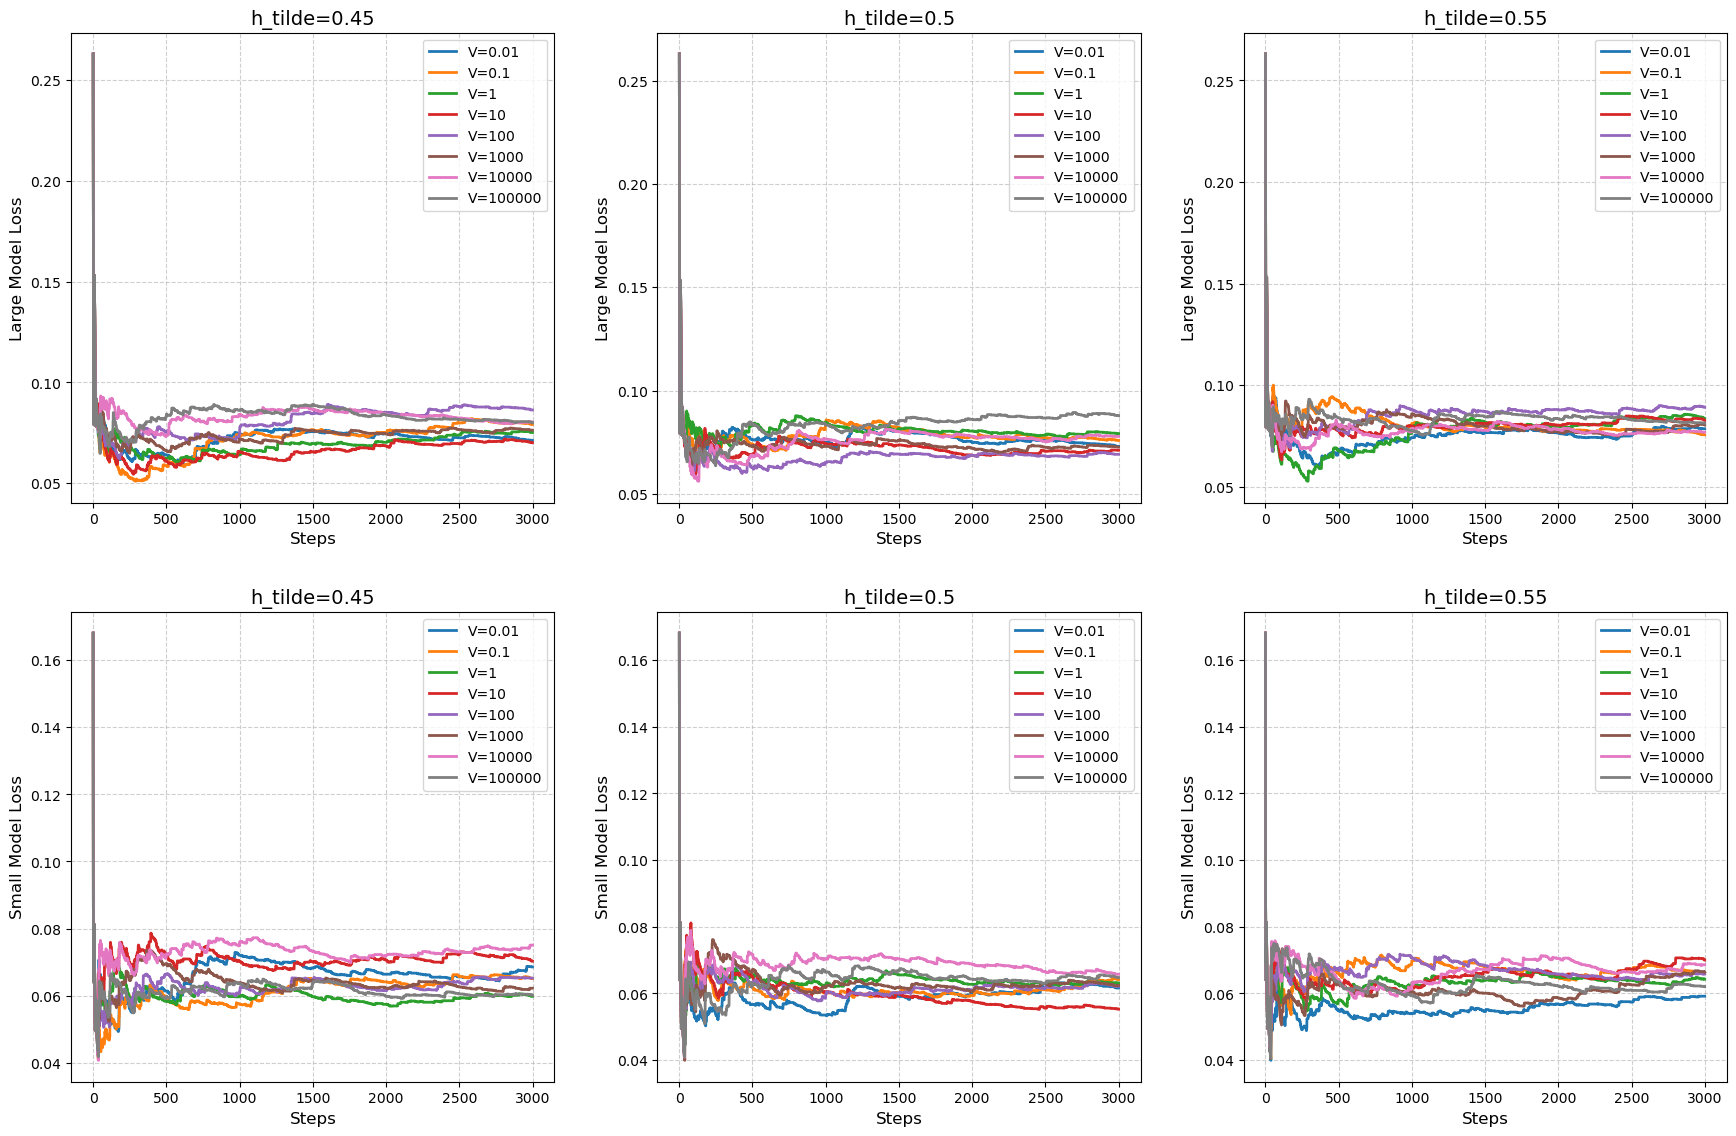

In [9]:
import glob
import json
import matplotlib.pyplot as plt

def plot_all_h_tilde_loss(h_tilde_values):
    fig, axs = plt.subplots(2, len(h_tilde_values), figsize=((len(h_tilde_values)) * 6, 12))

    for idx, h_tilde in enumerate(h_tilde_values):
        files = glob.glob('./experiments/fasttext/*fasttext*_h' + str(h_tilde) + '.json')
        files = sorted(files, key=(lambda x: float(x.split('_V')[1].split('_h')[0])))

        for fname in files:
            with open(fname, 'r') as f:
                d = json.load(f)

            V_str = fname.split('_V')[1].split('_h')[0]

            x = []
            l_loss = []
            s_loss = []

            for item in d:
                x.append(item['iteration'])
                l_loss.append(item['l_loss'])
                s_loss.append(item['s_loss'])

            axs[0, idx].plot(x, l_loss, label=f'V={V_str}', linewidth=2)
            axs[0, idx].set_title(f'h_tilde={h_tilde}', fontsize=14)
            axs[0, idx].set_xlabel('Steps', fontsize=12)
            axs[0, idx].set_ylabel('Large Model Loss', fontsize=12)
            axs[0, idx].grid(True, linestyle='--', alpha=0.6)
            axs[0, idx].legend(fontsize=10)
            axs[0, idx].tick_params(axis='both', labelsize=10)

            axs[1, idx].plot(x, s_loss, label=f'V={V_str}', linewidth=2)
            axs[1, idx].set_title(f'h_tilde={h_tilde}', fontsize=14)
            axs[1, idx].set_xlabel('Steps', fontsize=12)
            axs[1, idx].set_ylabel('Small Model Loss', fontsize=12)
            axs[1, idx].grid(True, linestyle='--', alpha=0.6)
            axs[1, idx].legend(fontsize=10)
            axs[1, idx].tick_params(axis='both', labelsize=10)
                
    plt.tight_layout(pad=3.0)
    plt.savefig('plots/losses_comparison.png', bbox_inches='tight', dpi=300)
    plt.show()

h_tilde_values = [0.45, 0.5, 0.55]
plot_all_h_tilde_loss(h_tilde_values)